<a href="https://colab.research.google.com/github/sampiecz/490_ASSN2/blob/master/ASSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data Set

import numpy as np

np.random.seed(12)
num_observations = 100

x1 = np.random.multivariate_normal([0,0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1,4], [[1, .75], [.75,1]], num_observations)

features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations,-1), np.ones(num_observations)))

print("Features\n", features)
print("Labels\n", labels)

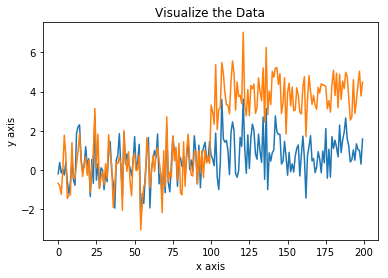

In [10]:
# Visualize the dataset
from matplotlib import pyplot as plt

plt.title("Visualize the Data")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(features)
plt.show()

In [0]:
# Training the dataset
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

